# **Predicting Customer Retention using Neural Networks at Kiwibank.**
The main goal of this project is to develop a neural network model that forecast customer retention at Kiwibank.

# **Contents**
* [1. Problem Definition](#problem)
* [2. Loading data and python packages](#1)
    * [2.1. Loading python packages](#1.1)    
    * [2.2. Data download](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1. Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Model Building](#3)        
    * [4.1. Model with 2 layers](#3.1)
    * [4.2. Model with 4 layers](#3.2)
    * [4.3. Model with 6 layers](#3.3)
    * [4.4. Model with 6 layers & Kernel Regularlizer](#3.4)
    * [4.5. Model with 6 layers & Dropout](#3.5)
    * [4.6. Model with 6 layers & Batch Normalization](#3.6)
    * [4.7. Model with 6 layers, Kernel Regularlizer & Batch Normalization](#3.7)
    * [4.8. Model Evaluation](#3.8)
* [5.Conclusion](#4)
* [6.References](#5)   

<a id='problem'></a>
# **1. Problem Definition**

> Kiwibank is currently facing significant challanges due to economic factors such as high inflation, rising interest rates, and increased bankruptcy among small businesses. These conditions create an unstable environment that can lead to higher credit risks and customer loss. The main motive is to predict customer retention amidst these adverse conditions which can help Kiwibank to develop targeted enagagement strategies which can optimize customer engagement and maintain performance in bad economy.


<a id='1'></a>
# **2. Loading data and python packages**


<a id='1.1'></a>
## **2.1. Loading python packages**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l2
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')

<a id='1.2'></a>
## **2.2. Data Download**

In [ ]:
#Uploading the data

uploaded= files.upload()

filename= list(uploaded.keys())[0]

data= pd.read_csv(io.BytesIO(uploaded[filename]))

Saving Customer_Infor1.csv to Customer_Infor1 (1).csv


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Tenure,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Female,2,42,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Female,1,41,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Female,8,42,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Female,1,39,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Female,2,43,125510.82,1,1,1,79084.10,0


<a id='2'></a>
# **3. Exploratory Data Analysis**

<a id='2.1'></a>
## **3.1. Descriptive Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Gender           10000 non-null  object 
 5   Tenure           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [ ]:
data.shape

(10000, 13)

In [ ]:
#Checking null values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Gender,0
Tenure,0
Age,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [ ]:
data.Gender.value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
data.Exited.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Tenure,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,5.012800,38.921800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,2.892174,10.487806,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,3.000000,32.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,5.000000,37.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,7.000000,44.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,10.000000,92.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


>> Credit Score range from 350 too 850

Average customer has been at Kiwibank for almost 5 years (mean: 5.01)

Average account balance is $76486

70% customers have a credit card.

The average age of sustomers is approximately 39 years, indicating a relatively young customer base.

<a id='2.2'></a>
## **3.2. Data Visualization**

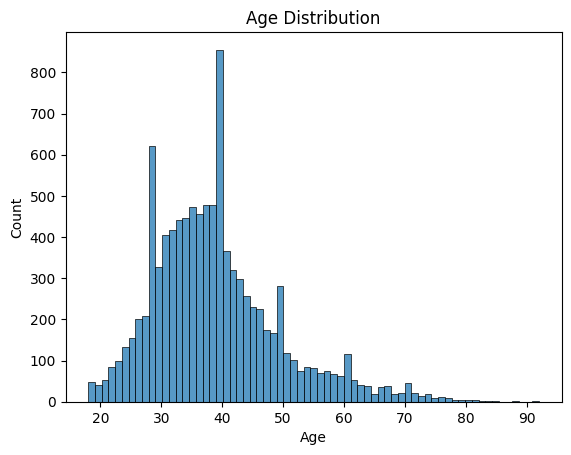

In [ ]:
sns.histplot(data.Age)
plt.title('Age Distribution')
plt.show()

> The histplot shows a roughly normal distribution, peaking arounf the mean age of approximately 39 years. Majority of the customers are between 30-4 years.

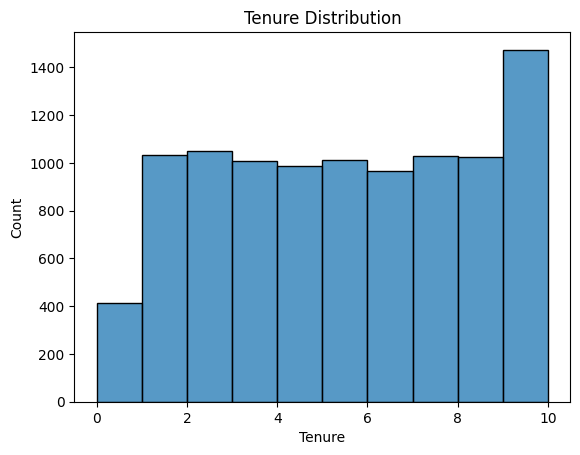

In [ ]:
sns.histplot(data.Tenure, bins= 10)
plt.title('Tenure Distribution')
plt.show()

> The average year that a Customer has been with Kiwibank is for atleast 5 years.

In [ ]:
data.Exited.value_counts()

,count
Exited,
0,7963
1,2037


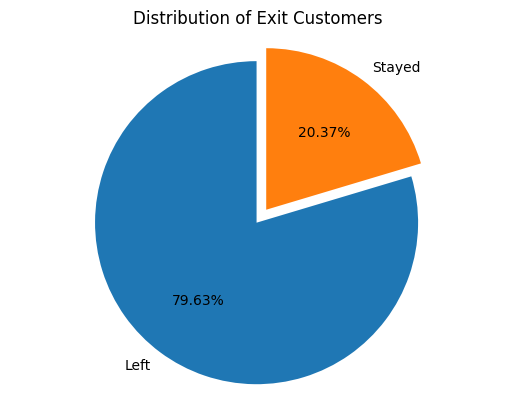

In [ ]:
exited_member_counts= data['Exited'].value_counts()
plt.pie(exited_member_counts, labels= ['Left','Stayed'], autopct='%0.2f%%', explode= (0,0.1), startangle= 90)
plt.axis('equal')
plt.title('Distribution of Exit Customers')
plt.show()

>> Majority of customers (79.6%) have left the Kiwibank, indicating a relatively significant attrition rate. This highlight a critical area for improvement in cusomer retention strategies.


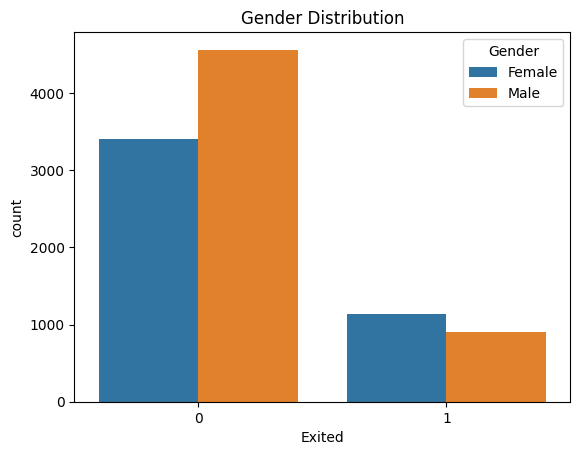

In [ ]:
sns.countplot(x= 'Exited', hue= 'Gender', data= data)
plt.title('Gender Distribution')
plt.show()

>> More number of males left the Kiwibank as compared to female. This begs for further investigation and strategies can be develop to specific gender.

In [ ]:
data.NumOfProducts.value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


<Axes: xlabel='NumOfProducts', ylabel='count'>

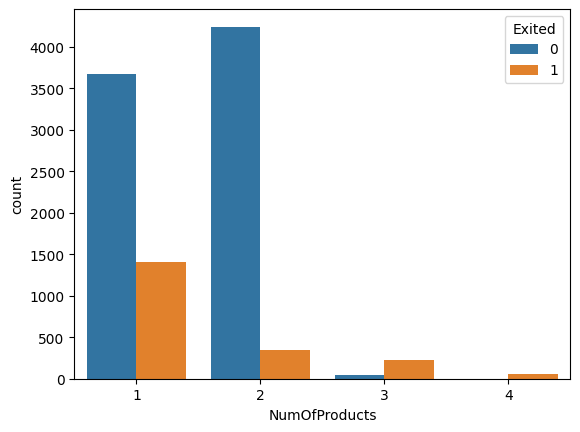

In [ ]:
sns.countplot(x= "NumOfProducts", hue= 'Exited', data= data)

> Customers using 1 products have higher ratio as compared to using multiple products. Customer using 2 products have left the most.

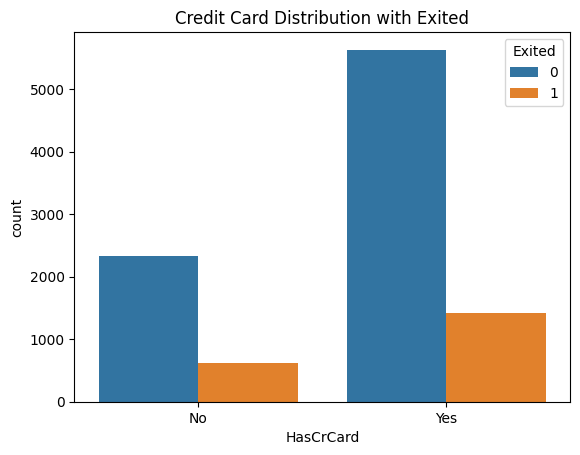

In [ ]:
sns.countplot(x= 'HasCrCard', hue= 'Exited', data= data)
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Credit Card Distribution with Exited')
plt.show()

>> People having credit card has significantly left the Kiwibank. Further investigation can be done why this number is high and develop strategies.

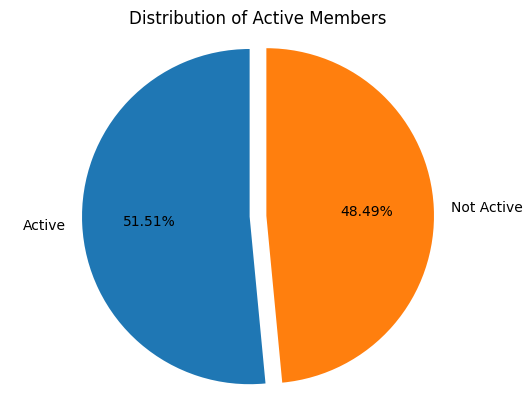

In [ ]:
active_member_counts= data['IsActiveMember'].value_counts()
plt.pie(active_member_counts, labels= ['Active', 'Not Active'], autopct='%0.2f%%', explode= (0,0.1), startangle= 90)
plt.axis('equal')
plt.title('Distribution of Active Members')
plt.show()

>> Higher Active members as compared to Non Active.

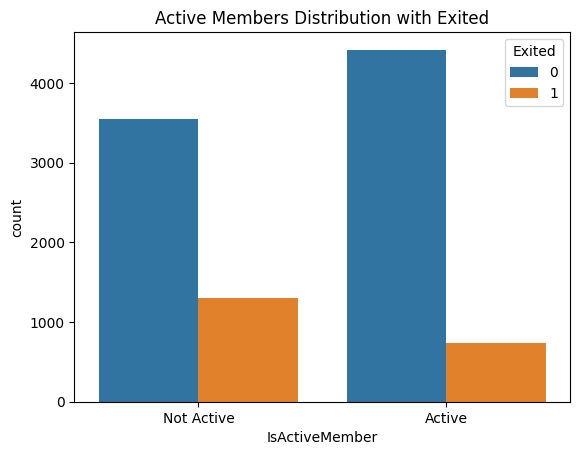

In [ ]:
sns.countplot(x= 'IsActiveMember', hue= 'Exited', data= data)
plt.xticks([0,1],['Not Active', 'Active'])
plt.title('Active Members Distribution with Exited')
plt.show()

>> The amount of Non active people staying in the company is high. Active customers are leaving the company more.

<Axes: xlabel='Balance', ylabel='Count'>

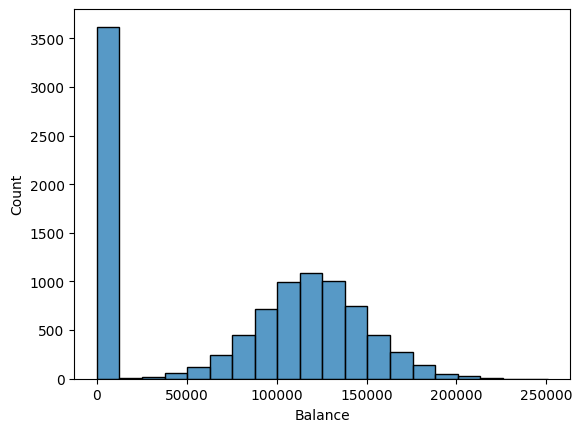

In [ ]:
sns.histplot(data.Balance, bins=20)

>> Many customers have balance 0.

In [ ]:
data.Balance.value_counts()

,count
Balance,
0.00,3617
130170.82,2
105473.74,2
85304.27,1
159397.75,1
...,...
81556.89,1
112687.69,1
108698.96,1


In [ ]:
## Encoding Gender

label= LabelEncoder()
data['Gender']= label.fit_transform(data['Gender'])

In [ ]:
data.Gender.value_counts()

,count
Gender,
1,5457
0,4543


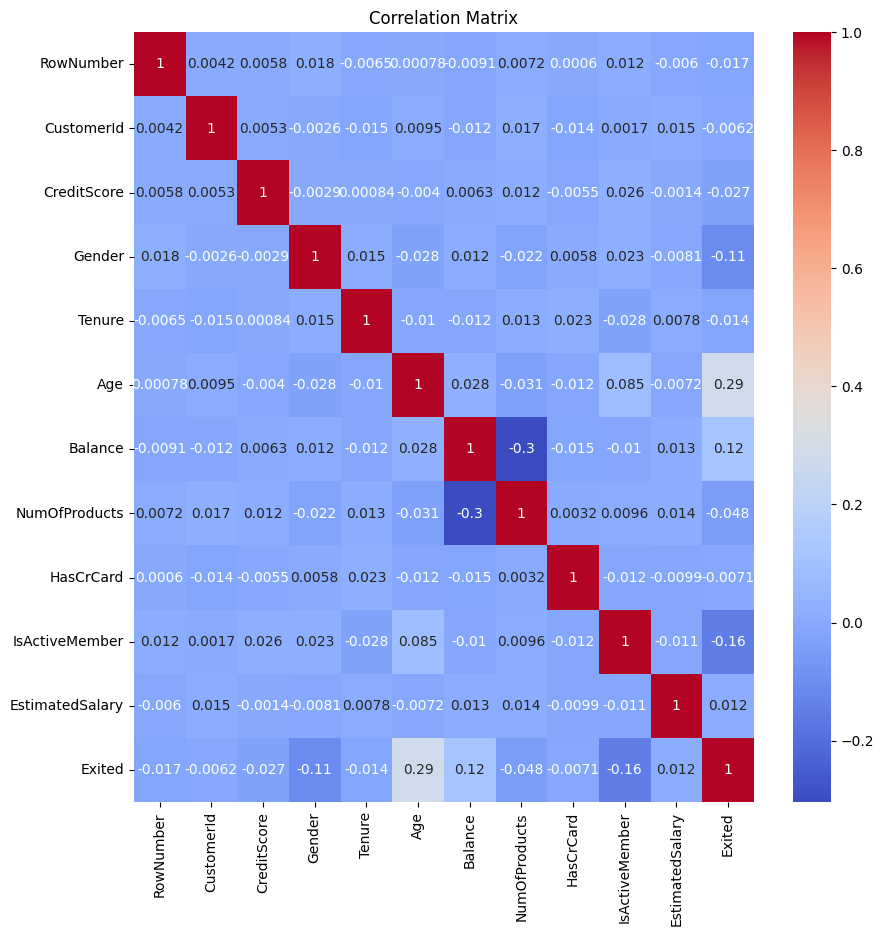

In [ ]:
numeric_data= data.select_dtypes(include= [np.number])
plt.figure(figsize= (10,10))
corr= numeric_data.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Customer's credit score has small positive correlation with Age which means older customers tend to have more slightly credit scores.

Gender have less influence on whether a customer leaves or not.

Age has moderate positive correlation with Exited which means older customers are more likely to leave the bank.

IsActiveMember shows a moderate megative corelation with Exited suggesting active members are less likely to leave.

<a id='3'></a>
# **4. Model Building**


In [ ]:
X= data[['CreditScore', 'Gender', 'Tenure', 'Age', 'Balance', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y= data[['Exited']]

In [ ]:
## Splitting the data

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
## Scaling the data

scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

<a id='3.1'></a>
## **4.1. Model with 2 layers**

In [ ]:
# Model1: 2 layers

model1= Sequential([
    Dense(16, activation='relu', input_dim= X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Compile model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train Model
history1= model1.fit(X_train_scaled, y_train, epochs=100, validation_data= (X_test_scaled, y_test), batch_size=32)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7690 - loss: 0.5571 - val_accuracy: 0.8170 - val_loss: 0.4312
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.4493 - val_accuracy: 0.8300 - val_loss: 0.4058
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8243 - loss: 0.4145 - val_accuracy: 0.8380 - val_loss: 0.3923
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.4057 - val_accuracy: 0.8455 - val_loss: 0.3802
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8387 - loss: 0.3871 - val_accuracy: 0.8505 - val_loss: 0.3721
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8502 - loss: 0.3696 - val_accuracy: 0.8525 - val_loss: 0.3658
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8476 - loss: 0.3709 - val_accuracy: 0.8585 - val_loss: 0.3626
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8560 - loss: 0.3582 - val_accu

In [ ]:
## Summary of the model

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 917 (3.59 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 612 (2.39 KB)

In [ ]:
y_pred= model1.predict(X_test_scaled)
y_pred_binary= [1 if p>0.5 else 0 for p in y_pred]

accuracy= accuracy_score(y_test, y_pred_binary)
auc= roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8545
AUC: 0.8416897447712062


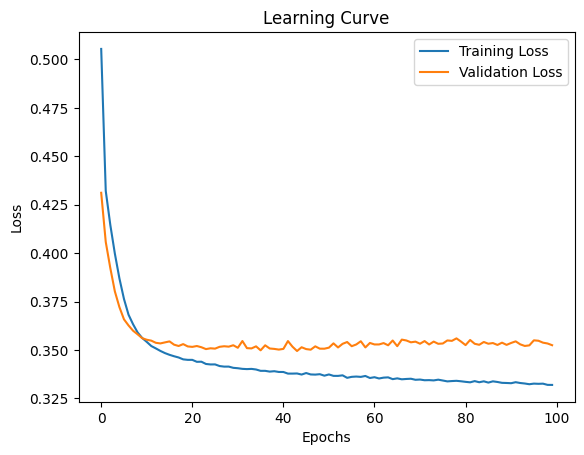

In [ ]:
# Learning Curve

plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

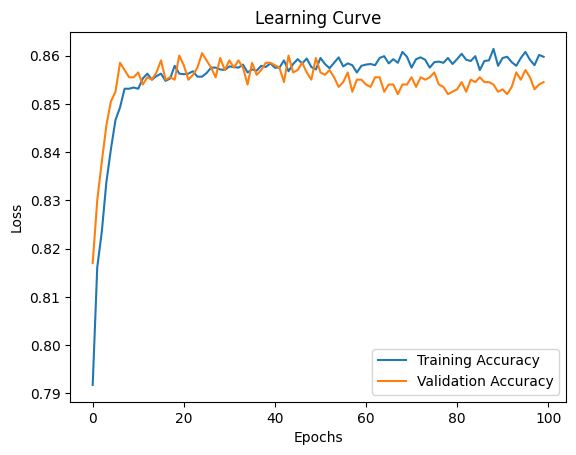

In [ ]:
# Learning Curve

plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<a id='3.2'></a>
## **4.1. Model with 4 layers**

In [ ]:
# Model1: 4 layers

model2= Sequential([
    Dense(8, activation='relu', input_dim= X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Compile model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train Model
history2= model2.fit(X_train_scaled, y_train, epochs=100, validation_data= (X_test_scaled, y_test), batch_size=32)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7831 - loss: 0.6019 - val_accuracy: 0.8035 - val_loss: 0.4726
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7945 - loss: 0.4754 - val_accuracy: 0.8035 - val_loss: 0.4368
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7909 - loss: 0.4493 - val_accuracy: 0.8030 - val_loss: 0.4162
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8089 - loss: 0.4214 - val_accuracy: 0.8265 - val_loss: 0.3987
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8157 - loss: 0.4028 - val_accuracy: 0.8470 - val_loss: 0.3808
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.4002 - val_accuracy: 0.8580 - val_loss: 0.3604
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.3788 - val_accuracy: 0.8615 - val_loss: 0.3527
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3554 - val_accu

In [ ]:
## Summary of the model

model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 8)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 917 (3.59 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 612 (2.39 KB)

In [ ]:
y_pred_1= model2.predict(X_test_scaled)
y_pred_binary_1= [1 if p>0.5 else 0 for p in y_pred_1]

accuracy= accuracy_score(y_test, y_pred_binary_1)
auc= roc_auc_score(y_test, y_pred_1)

print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy: 0.8565
AUC: 0.8479869400887656


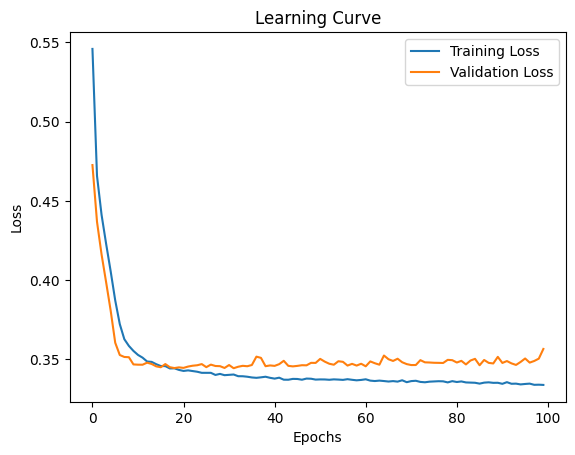

In [ ]:
# Learning Curve

plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<a id='3.3'></a>
## **4.3. Model with 6 layers**

In [ ]:
# Model1: 6 layers

model3= Sequential([
    Dense(8, activation='relu', input_dim= X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Compile model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train Model
history3= model3.fit(X_train_scaled, y_train, epochs=100, validation_data= (X_test_scaled, y_test), batch_size=32)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7564 - loss: 0.5742 - val_accuracy: 0.8035 - val_loss: 0.4669
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4650 - val_accuracy: 0.8215 - val_loss: 0.4335
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8078 - loss: 0.4455 - val_accuracy: 0.8270 - val_loss: 0.4216
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8196 - loss: 0.4284 - val_accuracy: 0.8280 - val_loss: 0.4136
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8248 - loss: 0.4149 - val_accuracy: 0.8295 - val_loss: 0.4116
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8236 - loss: 0.4238 - val_accuracy: 0.8275 - val_loss: 0.4093
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8213 - loss: 0.4225 - val_accuracy: 0.8335 - val_loss: 0.4021
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8256 - loss: 0.4069 - val_accu

In [ ]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 8)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,349 (5.27 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 900 (3.52 KB)

In [ ]:
y_pred= model3.predict(X_test_scaled)
y_pred_binary= [1 if p>0.5 else 0 for p in y_pred]

accuracy= accuracy_score(y_test, y_pred_binary)
auc= roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8595
AUC: 0.8443213612202338


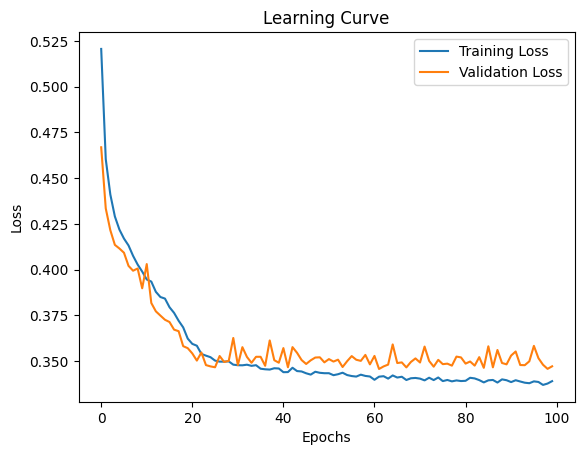

In [ ]:
# Learning Curve

plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

>> Since, using 6 layers we get more accuracy as compared to smaller layer. Therfore will use 6 layers to see the model is overfitting or not.

<a id='3.4'></a>
## **4.4. Model with 6 layers & Kernel Regularizer**

In [ ]:
# Model3: 6 layers

def best_model(input_shape):
  model= Sequential()

  model.add(Dense(8, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.01)))

  #Hidden Layers
  model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))

  model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  #Compile model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

  #build Model
model3_finetuned= best_model(X_train.shape[1])

  #Early Stopping
early_stopping= EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

  #Train Model 3 with early stopping
hisory3_finetuned= model3_finetuned.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data= (X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7473 - loss: 0.8558 - val_accuracy: 0.8035 - val_loss: 0.5636
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7936 - loss: 0.5474 - val_accuracy: 0.8035 - val_loss: 0.4606
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.4680 - val_accuracy: 0.8305 - val_loss: 0.4104
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8204 - loss: 0.4236 - val_accuracy: 0.8355 - val_loss: 0.3998
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8207 - loss: 0.4289 - val_accuracy: 0.8385 - val_loss: 0.3987
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8361 - loss: 0.4067 - val_accuracy: 0.8520 - val_loss: 0.3898
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8452 - loss: 0.3937 - val_accuracy: 0.8500 - val_loss: 0.3895
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8526 - loss: 0.3835 - val_accu

In [ ]:
model3_finetuned.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 8)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,349 (5.27 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 900 (3.52 KB)

In [ ]:
y_pred= model3_finetuned.predict(X_test_scaled)
y_pred_binary= [1 if p>0.5 else 0 for p in y_pred]

accuracy= accuracy_score(y_test, y_pred_binary)
auc= roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8605
AUC: 0.8413762308982173


<a id='3.5'></a>
## **4.5. Model with 6 layers & Dropout**

In [ ]:

def best_model(input_shape):
  model= Sequential()

  model.add(Dense(8, activation='relu', input_shape=(input_shape,)))
  model.add(Dropout(0.3))

  #Hidden Layers
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.3))

  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.1))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  #Compile model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

  #build Model
model3_finetuned= best_model(X_train.shape[1])

  #Early Stopping
early_stopping= EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

  #Train Model 3 with early stopping
hisory3_finetuned= model3_finetuned.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data= (X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7849 - loss: 0.5927 - val_accuracy: 0.8035 - val_loss: 0.4838
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7910 - loss: 0.5113 - val_accuracy: 0.8035 - val_loss: 0.4721
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8002 - loss: 0.4890 - val_accuracy: 0.8035 - val_loss: 0.4600
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8004 - loss: 0.4789 - val_accuracy: 0.8065 - val_loss: 0.4500
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4797 - val_accuracy: 0.8035 - val_loss: 0.4352
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8017 - loss: 0.4617 - val_accuracy: 0.8035 - val_loss: 0.4300
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.4800 - val_accuracy: 0.8095 - val_loss: 0.4267
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8059 - loss: 0.4489 - val_accu

In [ ]:
model3_finetuned.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 8)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,349 (5.27 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 900 (3.52 KB)

In [ ]:
y_pred= model3_finetuned.predict(X_test_scaled)
y_pred_binary= [1 if p>0.5 else 0 for p in y_pred]

accuracy= accuracy_score(y_test, y_pred_binary)
auc= roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.844
AUC: 0.843176560562805



<a id='3.6'></a>
## **4.6. Model with 6 layers & Batch Normalization**

In [ ]:

def best_model(input_shape):
  model= Sequential()

  model.add(Dense(8, activation='relu', input_shape=(input_shape,)))
  model.add(BatchNormalization())

  #Hidden Layers
  model.add(Dense(8, activation='relu'))
  model.add(BatchNormalization())

  model.add(Dense(8, activation='relu'))
  model.add(BatchNormalization())

  model.add(Dense(8, activation='relu'))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  #Compile model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

  #build Model
model3_finetuned= best_model(X_train.shape[1])

  #Early Stopping
early_stopping= EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

  #Train Model 3 with early stopping
hisory3_finetuned= model3_finetuned.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data= (X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7821 - loss: 0.5161 - val_accuracy: 0.7985 - val_loss: 0.4505
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7985 - loss: 0.4505 - val_accuracy: 0.8035 - val_loss: 0.4243
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.4396 - val_accuracy: 0.8035 - val_loss: 0.4154
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.4333 - val_accuracy: 0.8085 - val_loss: 0.4062
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8039 - loss: 0.4224 - val_accuracy: 0.8110 - val_loss: 0.4003
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8077 - loss: 0.4120 - val_accuracy: 0.8210 - val_loss: 0.3935
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8151 - loss: 0.4038 - val_accuracy: 0.8295 - val_loss: 0.3834
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8201 - loss: 0.4043 - val_accu

In [ ]:
model3_finetuned.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 8)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,541 (6.02 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 48 (192.00 B)

 Optimizer params: 996 (3.89 KB)

In [ ]:
y_pred= model3_finetuned.predict(X_test_scaled)
y_pred_binary= [1 if p>0.5 else 0 for p in y_pred]

accuracy= accuracy_score(y_test, y_pred_binary)
auc= roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.863
AUC: 0.846490623876773



<a id='3.7'></a>
## **4.7. Model with 6 layers, Kernel Regularization & Batch Normalization**

In [ ]:
## USE BOTH KERNEL REGULARIZATION AND BATCH NORMALIZATION BECAUSE ACCURACY HAS INCREASED


def final_model(input_shape):
  model= Sequential()

  model.add(Dense(8, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.1)))
  model.add(BatchNormalization())

  #Hidden Layers
  model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.1)))
  model.add(BatchNormalization())

  model.add(Dense(8, activation='relu'))
  model.add(BatchNormalization())

  model.add(Dense(8, activation='relu'))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(8, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  #Compile model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

  #build Model
model3_finetuned= final_model(X_train.shape[1])

  #Early Stopping
early_stopping= EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

  #Train Model 3 with early stopping
final_finetuned= model3_finetuned.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data= (X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4567 - loss: 2.0346 - val_accuracy: 0.8035 - val_loss: 0.9368
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7990 - loss: 0.8058 - val_accuracy: 0.8035 - val_loss: 0.5442
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8044 - loss: 0.5060 - val_accuracy: 0.8035 - val_loss: 0.4390
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8003 - loss: 0.4501 - val_accuracy: 0.8440 - val_loss: 0.3999
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8400 - loss: 0.4029 - val_accuracy: 0.8555 - val_loss: 0.3741
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.3831 - val_accuracy: 0.8525 - val_loss: 0.3732
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8547 - loss: 0.3733 - val_accuracy: 0.8510 - val_loss: 0.3774
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8451 - loss: 0.3851 - val_accu

In [ ]:
model3_finetuned.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                     │ (None, 8)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,541 (6.02 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 48 (192.00 B)

 Optimizer params: 996 (3.89 KB)

In [ ]:
y_pred= model3_finetuned.predict(X_test_scaled)
y_pred_binary= [1 if p>0.5 else 0 for p in y_pred]

accuracy= accuracy_score(y_test, y_pred_binary)
auc= roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'AUC: {auc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.864
AUC: 0.840426188858857


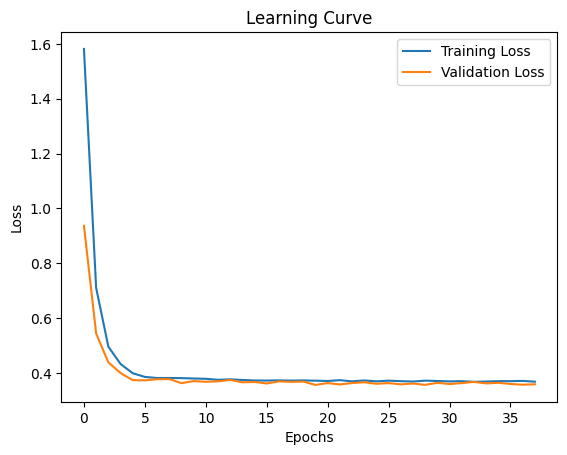

In [ ]:
# Learning Curve

plt.plot(final_finetuned.history['loss'], label='Training Loss')
plt.plot(final_finetuned.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

> From the learning curve we can see that predictions is good and its learning properly. It's likely to generalize well to unseen data.


<a id='3.7'></a>
## **4.7. Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

array([[1565,   42],
       [ 230,  163]])

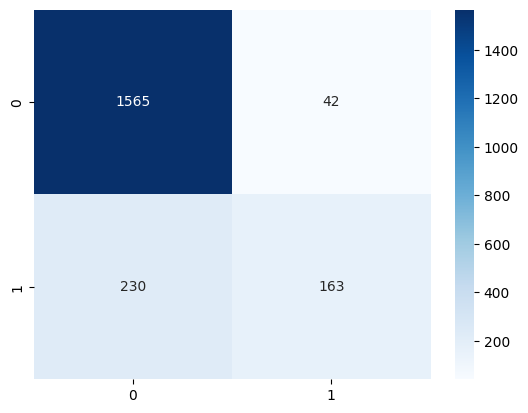

In [ ]:
conf_matrix= confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt='g')
conf_matrix

True Positive (TP) : 155 <br>
Customers who actually left and were correctly predicted as having left.

True Negative (TN): 1569 <br>
Customers who actually stayed and were correctly predicted as having stayed.

False Positive (TP) : 38 <br>
Customers who actually stayed but were incorrectly predicted as having left.

False Negative (TN): 238 <br>
Customers who actually left but were incorrectly predicted as having stayed.

In [ ]:
class_report= classification_report(y_test, y_pred_binary)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.80      0.41      0.55       393

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.86      0.86      0.85      2000



Overall, the classification report shows great result for model's performance, particularly identifying customers who will leave the bank.

Strong Precision and Recall for Class 0 (Leave): The model achieved a precision of 0.87 and recall of 0.98 for customers who leave, indicating that it correctly identifies leavers with high confidence and captures near all of them.

An accuracy of 0.86 suggests that the model performs well across the dataset. However, the recall of 0.41 for customers who stay indicates that the model struggles to identify these instances, which can lead to missed opportunities for retention efforts.

<a id='4'></a>
# **5. Conclusion**

> In conclusion, model effectively identified potential leavers, while there is room for improvement in recognizing customers who are likely to stay. Addressing these challanges will be crucial for enhancing Kiwibank's customer retention strategies and improve their performance. With overall accuracy of 0.86, the model shows strong performance across the dataset, highlighting its effctiveness in differentiating between two classes.

>> Also, additional features can be added to the model such as transcation history, engagement metrics, or customer feedbacks which improve the model's ability to identify loyal customers.


<a id='5'></a>
# **6. References**

> **yfinance Documentation:** https://pypi.org/project/yfinance/ <br>
**tensorflow Documentation:** https://www.tensorflow.org/api_docs/python/tf/keras <br>
**Model Evaluation Documentation:** https://scikit-learn.org/stable/modules/model_evaluation.html